# Log에서 loss와 나머지 score 분리하여 시각화

score는 우상향 그래프, loss는 우하향 그래프가 나와야 함

보기 편하게 따로 시각화 진행

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## binary 학습 후 log.csv 불러옴
df = pd.read_csv('/content/1_binary_origin_data_epoch25_log_220724.csv')
df

In [ ]:
## drop_loss = df에서 train_loss,test_loss 삭제 (score data만 남아있는 df)
drop_loss = df.drop(columns=['Train_loss', 'Test_loss'], axis=1)

In [ ]:
## loss_df = 슬라이싱을 통해 df에서 train_loss, test_loss만 남김 ( loss data만 남아있는 df )
loss_df = df[df.columns[:3]]

In [ ]:
# x축 epoch, figsize=그래프사이즈
drop_loss.plot(x='epoch',figsize=(15,8));
loss_df.plot(x='epoch',figsize=(15,8));

In [ ]:
## score 그래프 별로 색깔을 나눠주기 위한 작업
column_list = list(drop_loss.columns[1:])
color_list = ['red', 'orange', 'black', 'green', 'blue', 'purple']

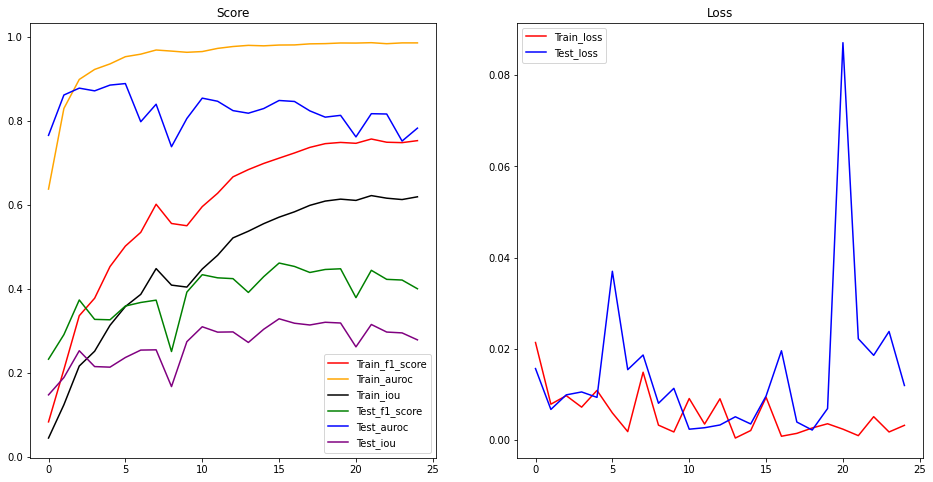

In [ ]:
fig = plt.figure(figsize=(16, 8))


ax = fig.add_subplot(1, 2, 1)
for color, column in zip(color_list, column_list):
    ax.plot(drop_loss[column], color=color, label=column)
ax.title.set_text("Score")
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(loss_df["Train_loss"], color="red", label="Train_loss")
ax.plot(loss_df["Test_loss"], color="blue", label="Test_loss")
ax.title.set_text("Loss")
ax.legend()

plt.show()